In [190]:
%matplotlib inline

In [191]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Unicorns: Where They Are, Industry Specialisation, and Rising Industries

### By Rachel Wilson

### This source code is licensed under CC-BY-SA-4.0 license found in the LICENSE file in the root directory of this source tree.

## Introduction

Startups are young companies which develop innovative products or services for people whose demand is not yet met by existing businesses. Globally there are 140,000 startups with a majority focussing on the internet and digital technologies. However, startups’ success rate is very small as 90% of them fail within a ten-year period (Startup Genome 2019, 19), primarily due to insufficient capital and a lack of market need (CB Insights 2021). Furthermore, CB Insights (2018) found that the odds of startups becoming unicorns, which are startups valued at $1 billion or more such as ride-hailing software company Uber, are only around 1%.

The rarity of unicorns raises questions about factors which contribute to driving up valuations. There are numerous factors ranging from the company’s sales and assets to the quality of the entrepreneur and of the venture capital (VC) firm (Gompers, et al. 2006, 18). This research will focus on three aspects. First is industry as certain industries have greater market opportunities for startups and also attract more investors than others. The second factor is geographical location which if supportive can provide startups with valuable networks of human capital and prospective investors. The third factor is investors whose role is significant given that starting up costs are high and it takes years for them to generate revenues from their innovation.

This research will examine whether unicorns are concentrated in certain industries or countries, and whether unicorns from different countries tend to specialise in different markets. Then, I will look at the top ten investors to check whether their investments specialise in particular industries or countries. Finally, I will investigate which industries have seen more or less growth in the number of unicorns in the recent years.

## Research  topic

### Background summary

Startups are more likely to succeed when operating in fast-expanding industries with growing customer segments. This aligns with how modern startups are mostly tech-centric as the IT revolution in the 1980s first led to innovations that gave us the Internet, then in the 2000s new companies began to create software programmes that “make up the content of the Internet”, connecting people for work, social and entertainment purposes (Grillo 2015, 40-1). Recently, health tech startups have also grown rapidly especially as the pandemic caused healthcare services to be overstretched. Furthermore, a startup’s industry significantly affects VC firms’ investment decisions (Gompers, et al 2020., 177), thereby making it an important factor of startups’ ability to grow and become billion-dollar companies.

Location can also be crucial when it provides a positive network effect, which means when environmental conditions supply startups with good connectivity to high quality research institutes, strong investor network and skilled labour such as the Silicon Valley (Bock and Hackober 2020, 977). In other words, innovation clusters support entrepreneurs and their ventures. But there seems to be variations among clusters as Bock and Hackober’s study didn’t find a statistically significant effect for Chinese clusters in Beijing and Shanghai. This may be due to Chinese clusters being relatively younger than Silicon Valley and thus not yet as developed. Nevertheless, startups in the US and China similarly face favourable conditions in terms of acquiring funds alternative to VCs (Jinzhi and Carrick 2019, 3379-80). The US has the Small Business Innovation Research grant programme, while in China government-backed investment programmes for startups at federal, provincial and local levels are available.

As a source of capital, investors play a major role in making sure that startups can remain in operation despite not receiving any earnings from their products yet. A survey found that most venture capital firms invested in three or more industries, but over 60% of them expressed specialising in a particular industry namely the IT and health industries (Gompers, et al. 2020, 174). Meanwhile, they were less likely to indicate focusing on a particular geography which suggests that most venture capitals invest in various geographies at once (ibid., 174). Since investors generally have preferences in terms of industry, they can further influence growth in the number of unicorns in certain industries apart from increasing the likelihood of startups becoming unicorns.

### Research questions

The following research questions will help indicate which industries have rapidly developing market opportunities and which countries are favourable to unicorns, whether countries and investors specialise in different markets, and also identify growth trends in the number of unicorns across industries.

1.	In which industries and countries are unicorns concentrated?
2.	Do countries vary in terms of their top industries with the most unicorns?
3.	Do investors specialise in particular industries or countries?
4.	What are the trends in the number of unicorns across different industries in 2014-2022?


## Data collection / Survey design

This researches uses a CB Insights’ database covering 1191 unicorn companies which was last updated on 7th October 2022. The database is in table form and contains the following variables:
i.	Company
ii.	Valuation in billion dollars
iii.	Date joined
iv.	Country
v.	City
vi.	Industry
vii.	Select investors

It is worth noting that the database is incomplete considering that there were over 1200 unicorns by the end of 2022, and that FTX, a cryptocurrency exchange company which went bankrupt in November 2022, is still in the database. Regardless, it holds a sufficiently large amount of data which allows for appropriate use. 

## Data overview and pre-processing

In [192]:
#load data
df = pd.read_excel("unicorns-data.xlsx", usecols='A:G')

#rename columns
df.rename(columns = {'Valuation ($B)': 'Valuation', 'Date Joined': 'Date', 'Select Investors': 'Investors'}, inplace=True)
df.index.name = 'id'

#drop FTX from the list because the company went bankrupt in Nov 2022
df = df.drop([9])

#assigning data types
df['City'] = df['City'].astype('category')
df['Country'] = df['Country'].astype('category')
df['Industry'] = df['Industry'].astype('category')
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df[['City', 'Country', 'Industry', 'Date']].dtypes

df

#investors data will be tidied up later

,Company,Valuation,Date,Country,City,Industry,Investors
id,,,,,,,
0,ByteDance,140.0,2017-04-07,China,Beijing,Artificial intelligence,Sequoia Capital China;SIG Asia Investments;Sin...
1,SpaceX,127.0,2012-12-01,United States,Hawthorne,Other,Founders Fund;Draper Fisher Jurvetson;Rothenbe...
2,SHEIN,100.0,2018-07-03,China,Shenzhen,E-commerce & direct-to-consumer,Tiger Global Management;Sequoia Capital China;...
3,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,Khosla Ventures;LowercaseCapital;capitalG
4,Checkout.com,40.0,2019-05-02,United Kingdom,London,Fintech,Tiger Global Management;Insight Partners;DST G...
...,...,...,...,...,...,...,...
1186,LinkSure Network,1.0,2015-01-01,China,Shanghai,Mobile & telecommunications,NaN
1187,InMobi,1.0,2014-12-02,India,Bengaluru,Mobile & telecommunications,Kleiner Perkins Caufield & Byers;Softbank Corp...
1188,TechStyle Fashion Group,1.0,2014-08-29,United States,El Segundo,E-commerce & direct-to-consumer,Matrix Partners;Passport Capital;Rho Ventures


In [193]:
# #total number of countries in the list - 47
# df['Country'].describe()

# #total number of cities in the list - 280
# df['City'].describe()

# #total number of industries in the list - 15
# df['Industry'].describe()

# #find min, max and average of valuation - 1, 14, 3.2
# df['Valuation'].describe()

# #the proportion of unicorns with the lowest valuation - 23 percent
# (df.loc[df['Valuation']==1.0].count()/1190)*100

# #the highest valued unicorn - bytedance
# df.loc[df['Valuation']==df['Valuation'].max()]

# #the first unicorn in the list - veepee
# df.loc[df['Date']==df['Date'].min()]

# #the latest unicorn in the list - equashield
# df.loc[df['Date']==df['Date'].max()]

There are 1190 unicorns distributed across 47 countries, 280 cities, and 15 industrial categories. The unicorns in the data have an average valuation of $3.2 billion. 23% of unicorns have the lowest valuation of 1 billion, whereas Chinese company Bytedance, which owns TikTok, is the highest valued at 140 billion. The oldest unicorn is French e-commerce company Veepee which joined in July 2007, and US health firm Equashield is the latest to join in October 2022. Finally, the total number of investors is 1356.

## Analysis and results

### RQ1: In which industries and countries are unicorns concentrated?

More than half (55%) of unicorns are located in the US with a total of 644 companies followed by China, India, the UK and Germany. Four of the top five cities with the most unicorns are also in the US and China. San Francisco, which has Silicon Valley, is ranked first with 169 firms. New York places second (114), then Beijing (62), Shanghai (44), and fifth, London (34). Meanwhile, 205 companies, or 18% of the world’s unicorns, are spread across the remaining 42 countries excluded from the top five list.

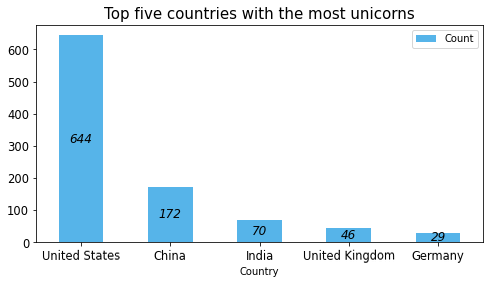

In [194]:
#number of unicorns by country
country = df['Country'].value_counts(dropna=True)
country = country.to_frame()
country = country.reset_index()
country.columns = ['Country','Count']
country['Country'] = country['Country'].astype('category')

#dataframe for top 5 countries
country = country.drop(country.index[5:])
country = country.set_index('Country')

#plot barh
ax = country.plot.bar(figsize=(8, 4), color='#56B4E9', fontsize=11.5, rot=0.3)
ax.set_xlabel('Country', fontsize='medium')
ax.set_title('Top five countries with the most unicorns', fontsize=15)

# for data values within bars
for i, rect in enumerate(ax.patches):
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()

    label_text = f'{height:.0f}'

    label_x = x + width / 2
    label_y = y + height / 2

    if height > 0.001:
        ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=12, fontstyle='oblique')


plt.show()

In [195]:
#Top five cities with the most unicorns
df['City'].value_counts(dropna=True).head()

San Francisco    169
New York         114
Beijing           62
Shanghai          44
London            36
Name: City, dtype: int64

When looking at the top five countries, it appears that unicorns tend to concentrate in particular geographies. For example, 644 US unicorns are distributed across 135 cities, but over 40% of them are based in San Francisco and New York. In China, more than one-third of unicorns are located in Beijing alone. But the most notable geographical concentration is in the UK with 78% of their unicorns based in London.

In [196]:
#top cities in US
usa = df.loc[df['Country'] == 'United States']
(usa['City'].value_counts().head()*100/644).round(2)

San Francisco    26.24
New York         17.70
Boston            3.42
Palo Alto         3.11
Mountain View     2.64
Name: City, dtype: float64

In [197]:
#top cities in China
china = df.loc[df['Country'] == 'China']
(china['City'].value_counts().head()*100/172).round(2)

Beijing      36.05
Shanghai     25.58
Shenzhen     11.63
Hangzhou      9.30
Guangzhou     2.91
Name: City, dtype: float64

In [198]:
#top cities in United Kingdom
uk = df.loc[df['Country'] == 'United Kingdom']
(uk['City'].value_counts().head()*100/46).round(2)

London        78.26
Bristol        4.35
Gloucester     2.17
Aberdeen       2.17
Cambridge      2.17
Name: City, dtype: float64

Fintech is the top industry with the most unicorns (21%). The highest valued fintech unicorn at $95 billion is US-based Stripe which offers online payment solutions. Nearly half of the world’s unicorns are in the top three industries including internet software & services and e-commerce & direct-to-consumer. The highest valued unicorns in the two latter groups are Australia’s graphic design platform Canva and China’s online fashion retailer SHEIN.

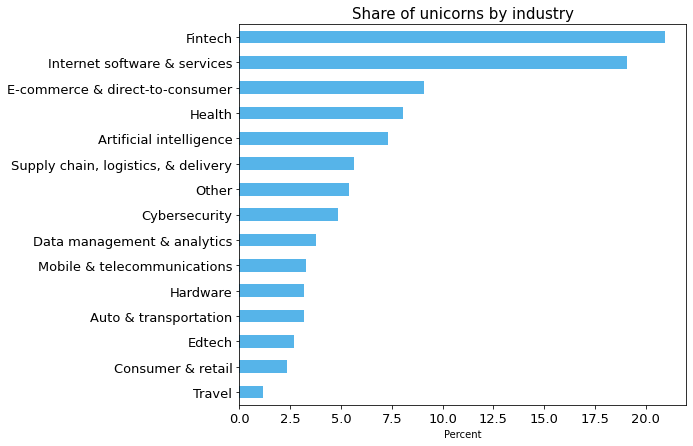

In [199]:
#plot number of unicorns by industry in percentage
ax = (df.Industry.value_counts()*100/1190).round(2).plot.barh(figsize=(8, 7), color='#56B4E9', fontsize=13)
ax.set_xlabel('Percent', fontsize='medium')
ax.set_title('Share of unicorns by industry', fontsize=15)
ax.invert_yaxis()

plt.show()

In [200]:
# #highest valued fintech unicorn
# df.loc[df['Industry']=='Fintech'].head(1)

# #highest valued internet unicorn
# df.loc[df['Industry']=='Internet software & services'].head(1)

# #highest valued e-commerce unicorn
# df.loc[df['Industry']=='E-commerce & direct-to-consumer'].head(1)

Health and artificial intelligence (AI) are fourth and fifth. They are industries which seem to have growing market opportunities for startups. This is against the background of rising demand for healthcare services and accessing healthcare benefits, and that machine learning technologies have made significant progress in recent years. Startups that develop technologies which enable self-driving cars or real-time analysis of consumer behaviour have greater potential growth compared with startups that sell, for instance, electronic cigarettes. This explains why health and AI industries have more unicorns than bottom industries such as consumer & retail and travel.

### RQ2: Do countries vary in terms of their top industries with the most unicorns?

The analysis here is narrowed down to the top five countries with the most unicorns because countries with relatively small number of unicorns do not have a reasonably sufficient number of unicorn representations across multiple industries.

The chart below illustrates the share of unicorns across different industries in the UK, India, Germany, the US and China. As mentioned previously, the fintech industry has the most unicorns, and it is apparent that fintech is among the top three industries in all countries except for China. The UK, in particular, has an exceptionally high share of unicorns in fintech at 59% and other industries are much less represented in comparison. This is mainly due to the country’s strong fintech ecosystem. London is a global financial centre with a high concentration of large pools of capital and skilled labour, making it one of the top three fintech hubs globally. According to a 2020 report, UK financial services spent nearly £100 billion on technology (Kimber 2021). UK fintechs mostly specialise in banking, payment technology, and wealth technology such as trading and investment platforms (Deloitte 2021).

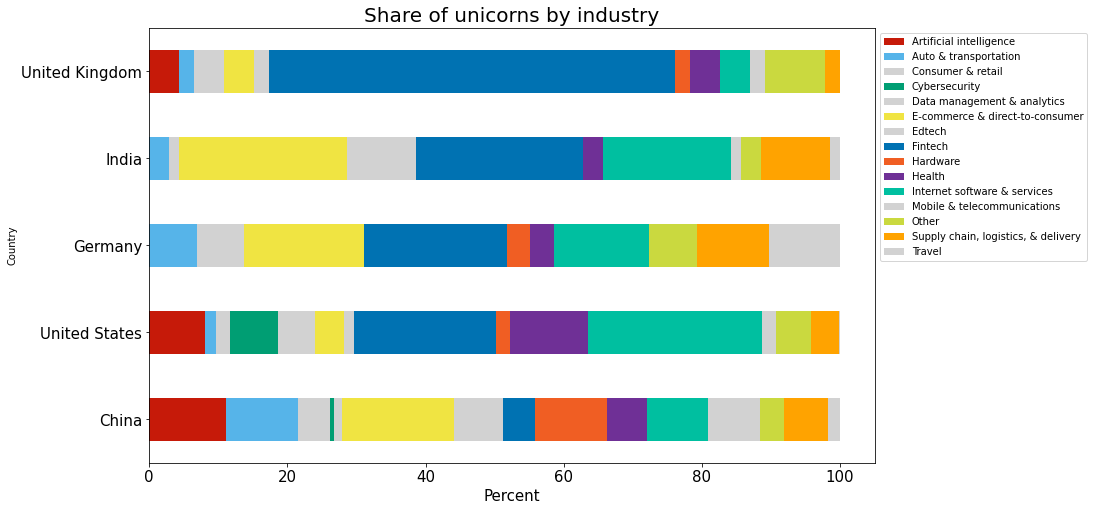

In [201]:
#crosstabulate country and industry
df2 = pd.crosstab(df['Country'], df['Industry'], normalize='index')

#narrow down to the top five countries' data
table = df2.loc[['United States', 'China', 'India', 'United Kingdom', 'Germany']]

# Sort by Fintech and convert to percentage.
table = table.sort_values(by='Fintech', ascending=False) * 100
colors = ['#C61A09', '#56B4E9', '#D2D2D2', '#009E73', '#D2D2D2', '#F0E442', '#D2D2D2', '#0072B2', '#F05E23', '#6F3096', '#00BFA0', '#D2D2D2', '#CAD93F', '#FFA300', '#D2D2D2']
ax = table.plot.barh(stacked=True, figsize=(13,8), fontsize=15, color=colors)
ax.invert_yaxis()
ax.set_title('Share of unicorns by industry', fontsize=20) 
ax.set_xlabel('Percent', fontsize=15)

# Place legend outside plot axes. 
ax.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

Surprisingly, fintech unicorns only account for 4.7% in China. Its largest unicorn industry is e-commerce & direct-to-consumer at 16%. Compared with other countries, China also has about even distribution of unicorns across various industries. Other strong industries in China include AI, hardware and auto & transportation. This can in part be attributed to greater adoption of advanced technologies by other industries which require AI-operated programmes such as in developing autonomous cars, and in other part to government push for expansion in AI such as the state council’s conception of the New Generation Artificial Intelligence Development Plan in 2017 (GMI Research 2021). Additionally, China’s electric vehicle (EV) market is the world’s largest (McKerracher 2022).

In the US, the top industry is in the internet software & services industry (25%), followed by fintech and health. The US’ dominance in internet startups is likely due to the country’s history of being a pioneer in developing the Internet. Moreover, tech giants like Microsoft and Alphabet were conceived there. Its digital health industry is also rapidly expanding not only because the pandemic has increased the use of digital technologies for resource management and patient monitoring in the healthcare sector, but also due to its ageing population with a higher incidence of chronic illnesses (Great Market Insights 2021). Unlike other countries, cybersecurity is also a strong industry for the US with 45 unicorns, whereas China only has one and others none. Generally, it is a newly rising industry as the digitisation of the economy has created greater demand for protection of data and against cyberattacks.

Meanwhile, India and Germany similarly share fintech, e-commerce & direct-to-consumer and internet software & services as their top three industries. India is advantaged by having the world’s second highest number of internet users and also a large pool of skilled IT workers. In Germany, the tech startup scene is growing in Berlin which managed to raise $13 billion in venture capital funding in the first three quarters of 2021 (Hodgson 2021).

Based on the data, there are variations in the distribution of unicorns across different industries among the top five countries. Variations are caused by a combination of multiple factors from market opportunities and government initiatives to the presence of supportive economic or innovative clusters. This can lead to countries specialising in different industries.

### RQ3: Do investors specialise in particular industries or countries?

The analysis here will focus on the top ten investors identified as those making the highest number of investments. Their investments account for 424 unique unicorns, or 35% of the total number of firms in the database, spread out across 33 countries. Table 1 shows that on average they invest in 10 countries and 12 out of 15 industries.

In [202]:
#table showing the top ten investors and count of their investments by company, country and industry

table1 = {'Investors': ['Accel', 'Andreessen Horowitz', 'Tiger Global Management', 'Insight Partners', 'Sequoia Capital', 'Sequoia Capital China', 'General Catalyst', 'Lightspeed Venture Partners', 'SoftBank Group', 'Index Ventures'],
        'Count of investments': [65, 62, 57, 54, 52, 48, 41, 40, 36, 33],
          'Count of countries they invest in': [15, 7, 13, 11, 10, 9, 7, 5, 9, 10],
          'Count of industries they invest in': [11, 13, 13, 11, 12, 13, 12, 12, 11, 10]
        }

table1 = pd.DataFrame(table1)
table1.set_index('Investors', inplace=True)
table1

,Count of investments,Count of countries they invest in,Count of industries they invest in
Investors,,,
Accel,65,15,11
Andreessen Horowitz,62,7,13
Tiger Global Management,57,13,13
Insight Partners,54,11,11
Sequoia Capital,52,10,12
Sequoia Capital China,48,9,13
General Catalyst,41,7,12
Lightspeed Venture Partners,40,5,12
SoftBank Group,36,9,11


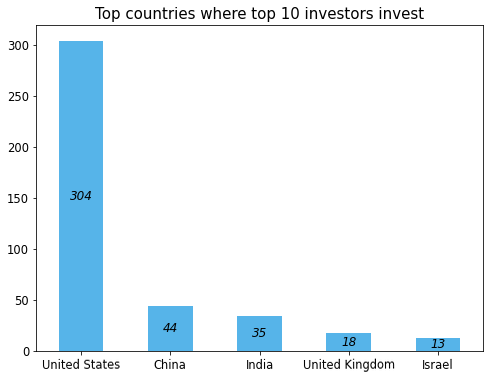

In [203]:
#tidying investors data
investors = df['Investors'].str.split(';', expand=True)
investors = investors.stack()
investors.name = 'investors'
investors = investors.astype('category')
investors.index.names = ['id', 'investor']
investors.head()

#create new dataframe showing where investors invest by company, country and industry
df3 = df[['Company', 'Country', 'Industry',]].join(investors)

#details about where top ten investors invest
subset = df3.reset_index().drop(columns=['id', 'investor']).set_index('investors')
subset = subset.loc[['Accel', 'Andreessen Horowitz', 'Tiger Global Management', 'Insight Partners', 'Sequoia Capital', 'Sequoia Capital China', 'General Catalyst', 'Lightspeed Venture Partners', 'SoftBank Group', 'Index Ventures']]

#plot top countries where top 10 investors invest
ax = subset.Country.value_counts().head().plot.bar(figsize=(8, 6), color='#56B4E9', fontsize=11.5, rot=0.3)
ax.set_title('Top countries where top 10 investors invest', fontsize=15)

# for data values within bars
for i, rect in enumerate(ax.patches):
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()

    label_text = f'{height:.0f}'

    label_x = x + width / 2
    label_y = y + height / 2

    if height > 0.001:
        ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=12, fontstyle='oblique')


plt.show()

The top five countries where the ten investors make their investments are similar to the top five countries with the most unicorns. The US is ranked first followed by China, India, then the UK. The only difference is that Israel makes the top five instead of Germany.

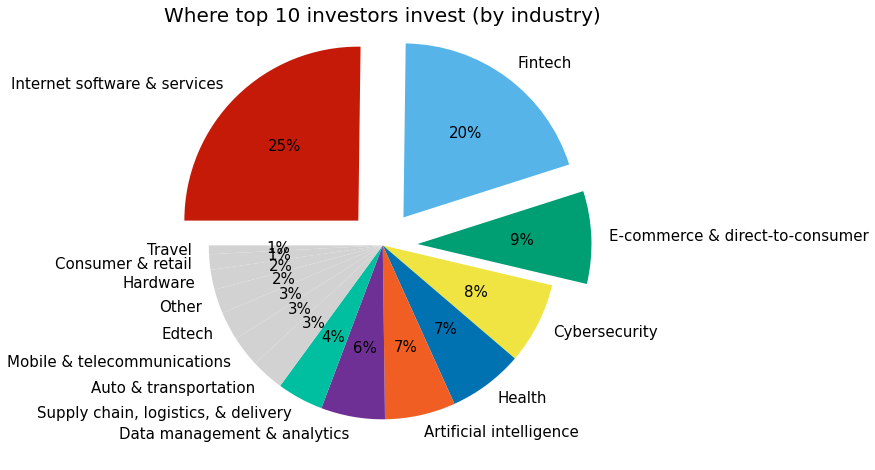

In [204]:
#plot top industries where top 10 investors invest
colors = ['#C61A09', '#56B4E9', '#009E73', '#F0E442', '#0072B2', '#F05E23', '#6F3096', '#00BFA0', '#D2D2D2', '#D2D2D2', '#D2D2D2', '#D2D2D2', '#D2D2D2', '#D2D2D2', '#D2D2D2']
explode = [0.2, 0.2, 0.2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

ax = subset['Industry'].value_counts().plot.pie(autopct='%1.0f%%',
                                       startangle=180,
                                       counterclock=False,
                                       figsize=(8,8),
                                       label='',
                                       textprops={'fontsize': 15},
                                       colors=colors,
                                       explode=explode,
                                       fontsize=15
                                      )
ax.set_title('Where top 10 investors invest (by industry)', fontsize=20)

plt.show()

Majority of their investments are also in the top three industries with the most unicorns. However, while the fintech industry has the highest number of unicorns, the above shows that the top ten investors make the most frequent investments in internet startups. Apart from that, cybersecurity is ranked above health and AI. There are 37 cybersecurity unicorns where the top ten investors invest in – 26 in the US and 8 in Israel, which explains Israel’s top fifth position. Israel has one of the largest clusters for cybersecurity innovation which managed to acquire venture capital funding of $8.8 billion in 2021. Israel’s economy also has a special focus on national defence, and it has experienced an increasing number of cyberattacks in the last couple of years (Jaghory 2022).

In [205]:
#data about the cybersecurity industry
df4 = subset.groupby(['Industry', 'Country']).count().dropna()
df4.loc[['Cybersecurity']]

Company
Industry      Country               
Cybersecurity Canada             1.0
              Israel             8.0
              Lithuania          1.0
              Switzerland        1.0
              United States     26.0

In [206]:
#table showing shows each investor’s top two countries and industries and their shares of investments in respective countries and industries as percentage of their total investments
table2 = {'Investors': ['Accel', 'Andreessen Horowitz', 'Tiger Global Management', 'Insight Partners', 'Sequoia Capital', 'Sequoia Capital China', 'General Catalyst', 'Lightspeed Venture Partners', 'SoftBank Group', 'Index Ventures'],
        'Country 1': ['United States', 'United States', 'United States', 'United States', 'United States', 'China', 'United States', 'United States', 'United States', 'United States'],
          'c1_%': [58.5, 90.3, 56.1, 61.1, 80.8, 79.2, 82.9, 80, 47.2, 57.6],
          'Country 2': ['India', 'Brazil', 'India', 'Israel', 'Israel', 'Australia', 'United Kingdom', 'India', 'India', 'France'],
          'c2_%': [13.8, 1.6, 21.1, 16.7, 3.8, 4.2, 4.9, 7.5, 19.4, 12.1],
          'Industry 1': ['Internet software & services', 'Internet software & services', 'Fintech', 'Internet software & services', 'Internet software & services', 'Artificial intelligence', 'Health', 'Internet software & services', 'E-commerce & direct-to-consumer', 'Internet software & services'],
          'i1_%': [30.8, 30.6, 33.3, 27.8, 25, 18.8, 22, 25, 25, 33.3],
          'Industry 2': ['Fintech', 'Fintech', 'Internet software & services', 'Fintech', 'Fintech', 'E-commerce & direct-to-consumer', 'Internet software & services', 'Cybersecurity', 'Auto & transportation', 'Fintech'],
          'i2_%': [23.1, 16.1, 28.1, 22.2, 17.3, 18.8, 22, 17.5, 16.7, 27.3]
        }

table2 = pd.DataFrame(table2)
table2.set_index('Investors', inplace=True)
table2

,Country 1,c1_%,Country 2,c2_%,Industry 1,i1_%,Industry 2,i2_%
Investors,,,,,,,,
Accel,United States,58.5,India,13.8,Internet software & services,30.8,Fintech,23.1
Andreessen Horowitz,United States,90.3,Brazil,1.6,Internet software & services,30.6,Fintech,16.1
Tiger Global Management,United States,56.1,India,21.1,Fintech,33.3,Internet software & services,28.1
Insight Partners,United States,61.1,Israel,16.7,Internet software & services,27.8,Fintech,22.2
Sequoia Capital,United States,80.8,Israel,3.8,Internet software & services,25.0,Fintech,17.3
Sequoia Capital China,China,79.2,Australia,4.2,Artificial intelligence,18.8,E-commerce & direct-to-consumer,18.8
General Catalyst,United States,82.9,United Kingdom,4.9,Health,22.0,Internet software & services,22.0
Lightspeed Venture Partners,United States,80.0,India,7.5,Internet software & services,25.0,Cybersecurity,17.5
SoftBank Group,United States,47.2,India,19.4,E-commerce & direct-to-consumer,25.0,Auto & transportation,16.7


Table 2 shows that half of their investments are generally spread out across two different industries. This suggests that even if specialisation takes place, it occurs over more than one industry.

A great majority also heavily invest in the US by having over half of their investments there, except for SoftBank Group and Sequoia Capital China, which is the only VC with a high share of investment in China. The second most preferred location appears to be India or alternatively Israel.

Unlike other top VC firms, Sequoia Capital China and General Catalyst also uniquely make considerable investments in AI and health respectively. This may be due to strong China’s AI development and growing digital health industry in the US.

### RQ4: What are the trends in the number of unicorns across different industries in 2014-2022?

Generally, 2021 saw the highest number of startups joining the unicorn club across industries. In total, 529 startups became unicorns in 2021, up from 106 in 2020. This is largely due to the sudden rise in funding sources as nontraditional investors like private equity firms becoming more willing to invest in early-stage startups lately. Crossover investors, who invest in both public and private markets, have also injected more capital in the latter. Additionally, fewer companies are going public before reaching a billion-dollar valuation to allow “crossover investors to take stakes in these private companies and secure for themselves an opportunity to further increase their position when an IPO occurs” (PitchBook 2021, 29-30).

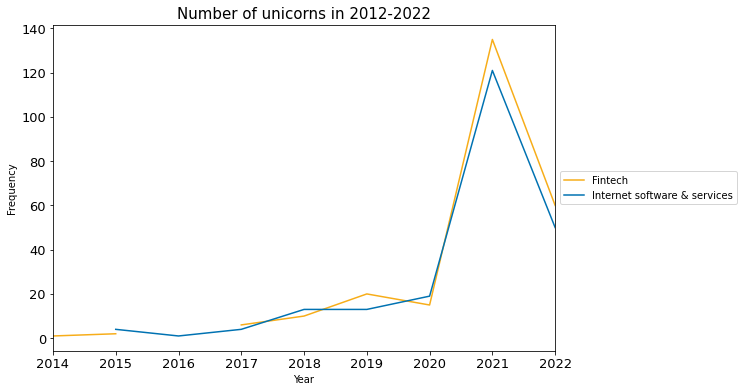

In [207]:
#load Year and Industry columns only and create new dataframe
df5 = pd.read_excel("unicorns-data.xlsx", usecols='C, F')

#tidy data
df5.rename(columns = {'Date Joined': 'Year'}, inplace=True)

#set year as index and only display year value
df5.set_index(['Year'], inplace=True)
df5 = df5.to_period('Y')
df5.sort_index(inplace=True)
df5.index.is_monotonic
pd.set_option('display.max_rows', 50)
df5['Industry'] = df5['Industry'].astype('category')

#group data by Year and Industry and save as a new dataframe
table = df5.groupby(['Year', 'Industry']).size()
table = table.to_frame()
table = table.loc[(table!=0).any(1)]
table.columns=['Count']

#drop companies that joined the unicorn club in 2007 and 2011
table = table.drop(['2007','2011'])

#plot number of fintech and internet startups from 2014 to 2022
subset1 = table.loc[
    (
        ['2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022'], # all years
        ['Fintech', 'Internet software & services'], 
    ),:]

ax = subset1.Count.unstack().plot(grid=False, legend=True, color=['#F7AD19', '#0072B2'], figsize=(9,6), fontsize=13)
ax.set_title('Number of unicorns in 2012-2022', fontsize=15)
ax.set_ylabel('Frequency')
ax.set_xlabel('Year')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

The rise in the number of unicorns has been the most notable in fintech and internet software & services. They remain the top industries producing the most unicorns even though the significant rise in unicorns has come down to just over 230 companies joining in 2022 with 60 fintech and 50 internet startups. 

There are five other promising industries specifically health, e-commerce & direct-to-consumer, supply chain, logistics & delivery, AI, and cybersecurity as highlighted in the figure below. The number of unicorns produced in each of these five industries ranged from 27 to 41 in 2021. In 2022, each contributed over 10 which is lower than the previous year but still higher than any other years before 2021.

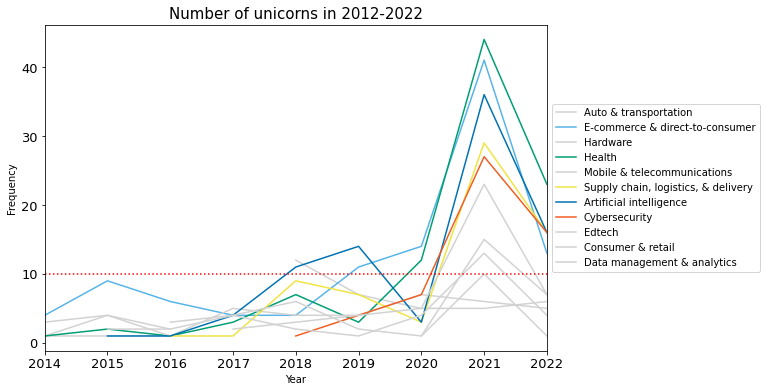

In [208]:
#plot number of startups in other industries from 2014 to 2022
subset2 = table.loc[
    (
        ['2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022'], # all years
        ['E-commerce & direct-to-consumer', 'Health', 'Artificial intelligence', 'Supply chain, logistics, & delivery', 'Cybersecurity', 'Data management & analytics', 'Mobile & telecommunications', 'Auto & transportation', 'Hardware', 'Edtech', 'Consumer & retail'], 
    ),:]

colors = ['#D2D2D2', '#56B4E9', '#D2D2D2', '#009E73', '#D2D2D2', '#F0E442', '#0072B2', '#F05E23', '#D2D2D2', '#D2D2D2', '#D2D2D2']
ax = subset2.Count.unstack().plot(grid=False, legend=True, figsize=(9,6), fontsize=13, color=colors)
ax.set_title('Number of unicorns in 2012-2022', fontsize=15)
ax.set_ylabel('Frequency')
ax.set_xlabel('Year')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.axhline(y = 10, color = 'r', linestyle = ':', label = "red line")

plt.show()

As mentioned earlier, digital health is a growing industry largely due to the pandemic changing the delivery of healthcare services. E-commerce has also boomed since the pandemic when retail stores closed and people were confined to their homes. Growth in the number of mobile device users, online marketplaces and integration with social media, for example, sellers promoting their products on Instagram, are also driving forces of growth in e-commerce. Furthermore, the pandemic has changed people’s mobile behaviour. This has created growth opportunities in the logistics & delivery industry such as grocery or medicine delivery or even meeting the delivery needs of sellers on e-commerce platforms (Eckert 2022, 10). Meanwhile, the cybersecurity industry is particularly expanding in the US and Israel as demand for data protection and online security increases. Finally, AI is flourishing as technological adoption in other industries require the development of sophisticated machine learning programmes whether for developing new vaccines or for operating autonomous cars.

## Conclusions

This research has shown that unicorns are mostly concentrated in the US and China with 70% of the world’s unicorns collectively. These unicorns are also concentrated in economic or innovation clusters namely the Silicon Valley in San Francisco, New York, Beijing, Shanghai and London. These clusters can provide positive network effect for entrepreneurs. Most unicorns are in fintech, internet and e-commerce. However, there are variations across countries which suggest industry specialisation. For example, the UK specialising in fintech, the US in internet software and health technology, and China in e-commerce and AI.

This research further found that the top ten investors’ cumulative investments are broad covering at least 10 industries and up to 15 countries. But they appear to favour internet and fintech startups, except for three VC firms that prefer health, e-commerce or AI companies. Regardless, they do not specialise in a single industry and substantially invest in more than one industry simultaneously instead. Since all of them predominantly invest in US unicorns, except one China-based VC, this indicates geographical specialisation to some extent despite their willingness to invest broadly globally.

Lastly, health, e-commerce, mobility, AI and cybersecurity industries are demonstrating rapidly growing market opportunities which may produce even more unicorns in the future. Besides increasing capital inflow from VCs, the driving forces of growth in those industries include newly developed clusters with a special industrial focus, COVID-19-related changing consumer behaviour, government initiatives, and demand for technological advancements as a result of linkages among industries.

## References

Bock, Carolin, and Christian Hackober. 2020. "Unicorns—What Drives Multibillion-Dollar Valuations?" Business Research 13: 949-984.

CB Insights. 2022. “The Complete List of Unicorn Companies.” CB Insights. Accessed December 28, 2022. https://www.cbinsights.com/research-unicorn-companies

—. 2021. The Top 12 Reasons Startups Fail. August 3. Accessed January 3, 2023. https://www.cbinsights.com/research/report/startup-failure-reasons-top/.

—. 2018. Venture Capital Funnel Shows Odds Of Becoming A Unicorn Are About 1%. September 6. Accessed January 3, 2023. https://www.cbinsights.com/research/venture-capital-funnel-2/.

Deloitte. 2021. The UK FinTech Landscape. Accessed January 3, 2023. https://www2.deloitte.com/uk/en/pages/financial-services/articles/uk-fintech-landscape.html.

Eckert, Huff Vicki. 2022. "Unicorns in Digital Economy: 5 Emerging Trends." pwc. January 17. Accessed January 3, 2023. https://www.pwc.com/gx/en/issues/reinventing-the-future/take-on-tomorrow/download/sbpwc-2022-01-17-World-of-unicorns.pdf.

Global Market Insights. 2022. "Digital Health Market Size & Share | Trends Report, 2022-2030." Global Market Insights. September. Accessed January 3, 2023. https://www.gminsights.com/industry-analysis/digital-health-market.

GMI Research. 2021. "China AI Market Opportunities & Forecast 2021-2028." GMI Research. January. Accessed January 3, 2023. https://www.gmiresearch.com/report/china-ai-market/.

Gompers, Paul, Anna Kovner, Josh Lerner, and David Scharfstein. 2006. “Skill vs Luck in Entrepreneurship and Venture Capital: Evidence from Serial Entrepreneurs.” NBER Working Paper 12592, National Bureau of Economic Research, Cambridge. http://www.nber.org/papers/w12592 

Gompers, Paul, Will Gornall, Steven Kaplan, and Ilya Strebulaev. 2020. "How Do Venture Capitalists Make Decisions?" Journal of Financial Economics 135: 169-190.

Grillo, Edoardo. 2015. An Investigation on the Economics of Unicorns and Their Valuations as a Signal of a New Technological Bubble. Thesis, Rome: LUISS. https://tesi.luiss.it/18497/1/668061_GRILLO_EDOARDO.pdf

Hodgson, Leah. 2021. How Foreign Investors Are Tapping into Germany’s Late-Stage VC Boom. November 25. Accessed January 3, 2023. https://pitchbook.com/news/articles/foreign-investors-tapping-into-germanys-late-stage-vc-boom.

Jaghory, Dillon. 2022. Cybersecurity in Israel: Fortifying Digital Defenses Amid Elevated Risks. July 14. Accessed January 3, 2023. https://www.nasdaq.com/articles/cybersecurity-in-israel%3A-fortifying-digital-defenses-amid-elevated-risks.

Jinzhi, Zhai, and Jon Carrick. 2019. "The Rise of the Chinese Unicorn: An Exploratory Study of Unicorn Companies in China." Emerging Markets Finance and Trade 55 (15): 3371-3385.

Kimber, Anita. 2021. Why Fintech Is Core to the UK's Future Success. April 16. Accessed January 3, 2023. https://www.ey.com/en_uk/financial-services/why-fintech-is-core-to-the-uk-future-success.

McKerracher, Colin. 2022. China Has Shot at Seizing 60% Share of Global EV Sales This Year . November 15. Accessed January 3, 2023. https://www.bloomberg.com/news/articles/2022-11-15/china-has-shot-at-seizing-60-share-of-global-ev-sales-this-year.

PitchBook. 2021. "PitchBook-NVCA Venture Monitor Q3 2021." PitchBook. October 13. Accessed January 3, 2023. https://files.pitchbook.com/website/files/pdf/Q3_2021_PitchBook-NVCA_Venture_Monitor.pdf.

Startup Genome. 2019. Global Startup Ecosystem Report 2019. Startup Genome. https://startupgenome.com/reports/global-startup-ecosystem-report-2019

Startup Ranking. 2022. Countries - With the Top Startups Worldwide. Accessed January 3, 2023. https://www.startupranking.com/countries.

## Appendices

In [209]:
#identifying top 10 investors and the number of investments they make
t10_inv = df3.groupby(['investors']).count()
t10_inv.reset_index(inplace=True)
t10_inv.sort_values(by='Industry',ascending=False).head(10)

# #number of unique companies where top ten investors invest - 424
# subset['Company'].value_counts().describe()

# #number of unique countries where top ten investors invest - 33
# country = subset['Country'].value_counts().dropna()
# country[country!=0].count()

,investors,Company,Country,Industry
30,Accel,65,65,65
87,Andreessen Horowitz,62,62,62
1204,Tiger Global Management,57,57,57
633,Insight Partners,54,54,54
1060,Sequoia Capital,52,52,52
1061,Sequoia Capital China,48,48,48
511,General Catalyst,41,41,41
743,Lightspeed Venture Partners,40,40,40
1111,SoftBank Group,36,36,36
623,Index Ventures,33,33,33


In [210]:
#CODE TO FIND OUT INFO TO CREATE TABLE 1

#count of countries 'investor' invests in
tab1 = subset.groupby(['investors', 'Country']).count().dropna()
tab1.loc['Index Ventures'].count()

#count of industries 'investor' invests in
tab2 = subset.groupby(['investors', 'Industry']).count().dropna()
tab2.loc['Tiger Global Management'].count()

Company    13
Country    13
dtype: int64

In [211]:
#CODE TO FIND OUT INFO TO CREATE TABLE 2

#identify top two countries 'investor' invests in
sub = tab1.loc[('Index Ventures', slice(None),),:]
(sub['Company'].nlargest(2)*100/sub['Company'].sum()).round(1)

#identify top two industries 'investor' invests in
sub = tab2.loc[('Index Ventures', slice(None),),:]
(sub['Company'].nlargest(2)*100/sub['Company'].sum()).round(1)

investors       Industry                    
Index Ventures  Internet software & services    33.3
                Fintech                         27.3
Name: Company, dtype: float64

In [212]:
#sum of unicorns that joined in 2022 - 238
table.loc[('2021', slice(None),),:].sum()

#sum of unicorns that joined in 2022 - 529
table.loc[('2022', slice(None),),:].sum()

#count of fintech unicorns in 2021 - 60
table.loc[('2022', 'Fintech',),:]

#count of fintech unicorns in 2021 - 50
table.loc[('2022', 'Internet software & services',),:]

#number of new unicorns in every industry in 2021
table.loc[('2021', slice(None),),:]

Count
Year Industry                                  
2021 Artificial intelligence                 36
     Auto & transportation                    5
     Consumer & retail                       10
     Cybersecurity                           27
     Data management & analytics             23
     E-commerce & direct-to-consumer         41
     Edtech                                  13
     Fintech                                135
     Hardware                                15
     Health                                  44
     Internet software & services           121
     Mobile & telecommunications              6
     Other                                   21
     Supply chain, logistics, & delivery     29
     Travel                                   3